In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve,RocCurveDisplay
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import pickle

#### Project Description
#### The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
#### This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
#### Attribute Information
#### Input variables (based on physicochemical tests):
#### 1 - fixed acidity
#### 2 - volatile acidity
#### 3 - citric acid
#### 4 - residual sugar
#### 5 - chlorides
#### 6 - free sulfur dioxide
#### 7 - total sulfur dioxide
#### 8 - density
#### 9 - pH
#### 10 - sulphates
#### 11 - alcohol
#### Output variable (based on sensory data):
#### 12 - quality (score between 0 and 10)


In [4]:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/winequality-red.csv')
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
df.shape

(1599, 12)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

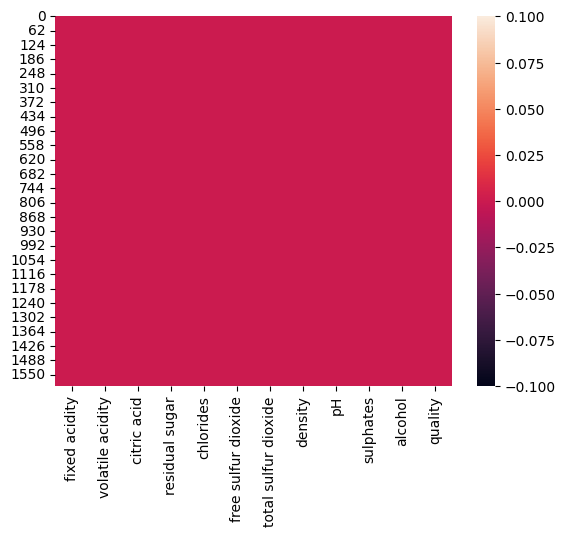

In [11]:
sns.heatmap(df.isnull())

In [12]:
for column in df.columns:
    un=df[column].unique()
    
    print(column,un.size)
   

fixed acidity 96
volatile acidity 143
citric acid 80
residual sugar 91
chlorides 153
free sulfur dioxide 60
total sulfur dioxide 144
density 436
pH 89
sulphates 96
alcohol 65
quality 6


In [13]:

for column in df.columns:
    count=df[column].value_counts()
    print(count)


7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11

In [14]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

<function matplotlib.pyplot.show(close=None, block=None)>

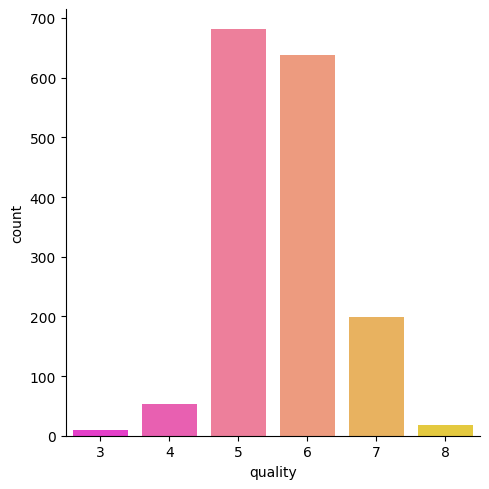

In [15]:
sns.catplot(x='quality',data=df,kind='count',palette='spring')
plt.show

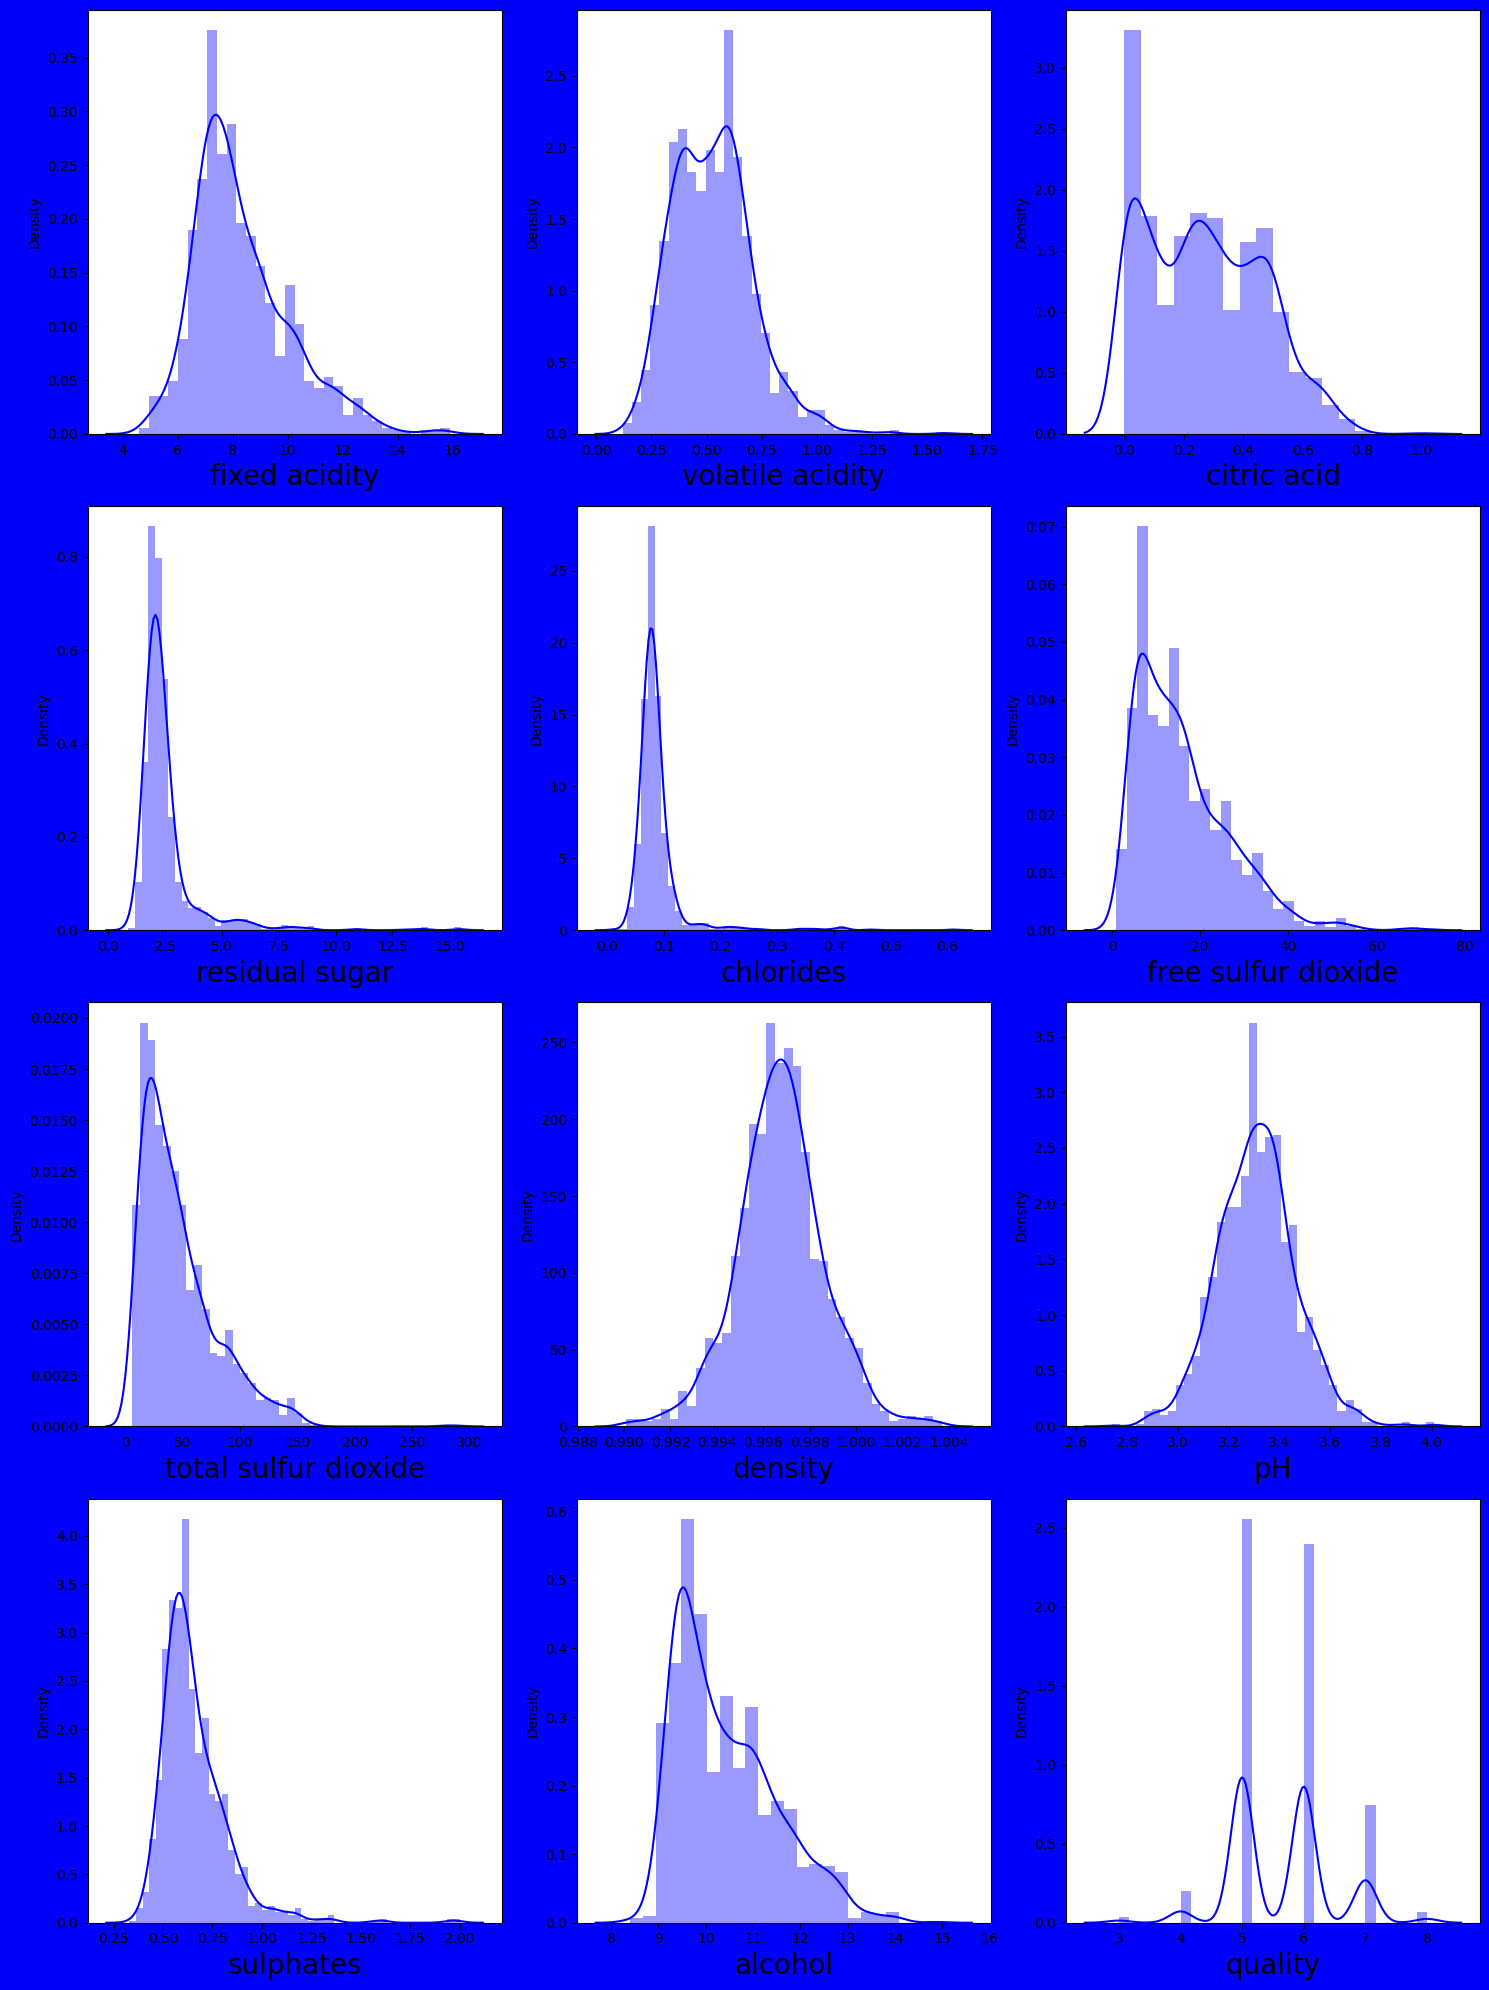

In [16]:
plt.figure(figsize=(15,20),facecolor='blue')
plotnumber=1
for column in df:
    anext=plt.subplot(4,3,plotnumber)
    sns.distplot(df[column],color='blue')
    plt.xlabel(column,fontsize='20')
    plotnumber+=1
plt.tight_layout()      

    

In [17]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [18]:
df['chlorides']=np.cbrt(df['chlorides'])
df['residual sugar']=np.cbrt(df['residual sugar'])

In [19]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

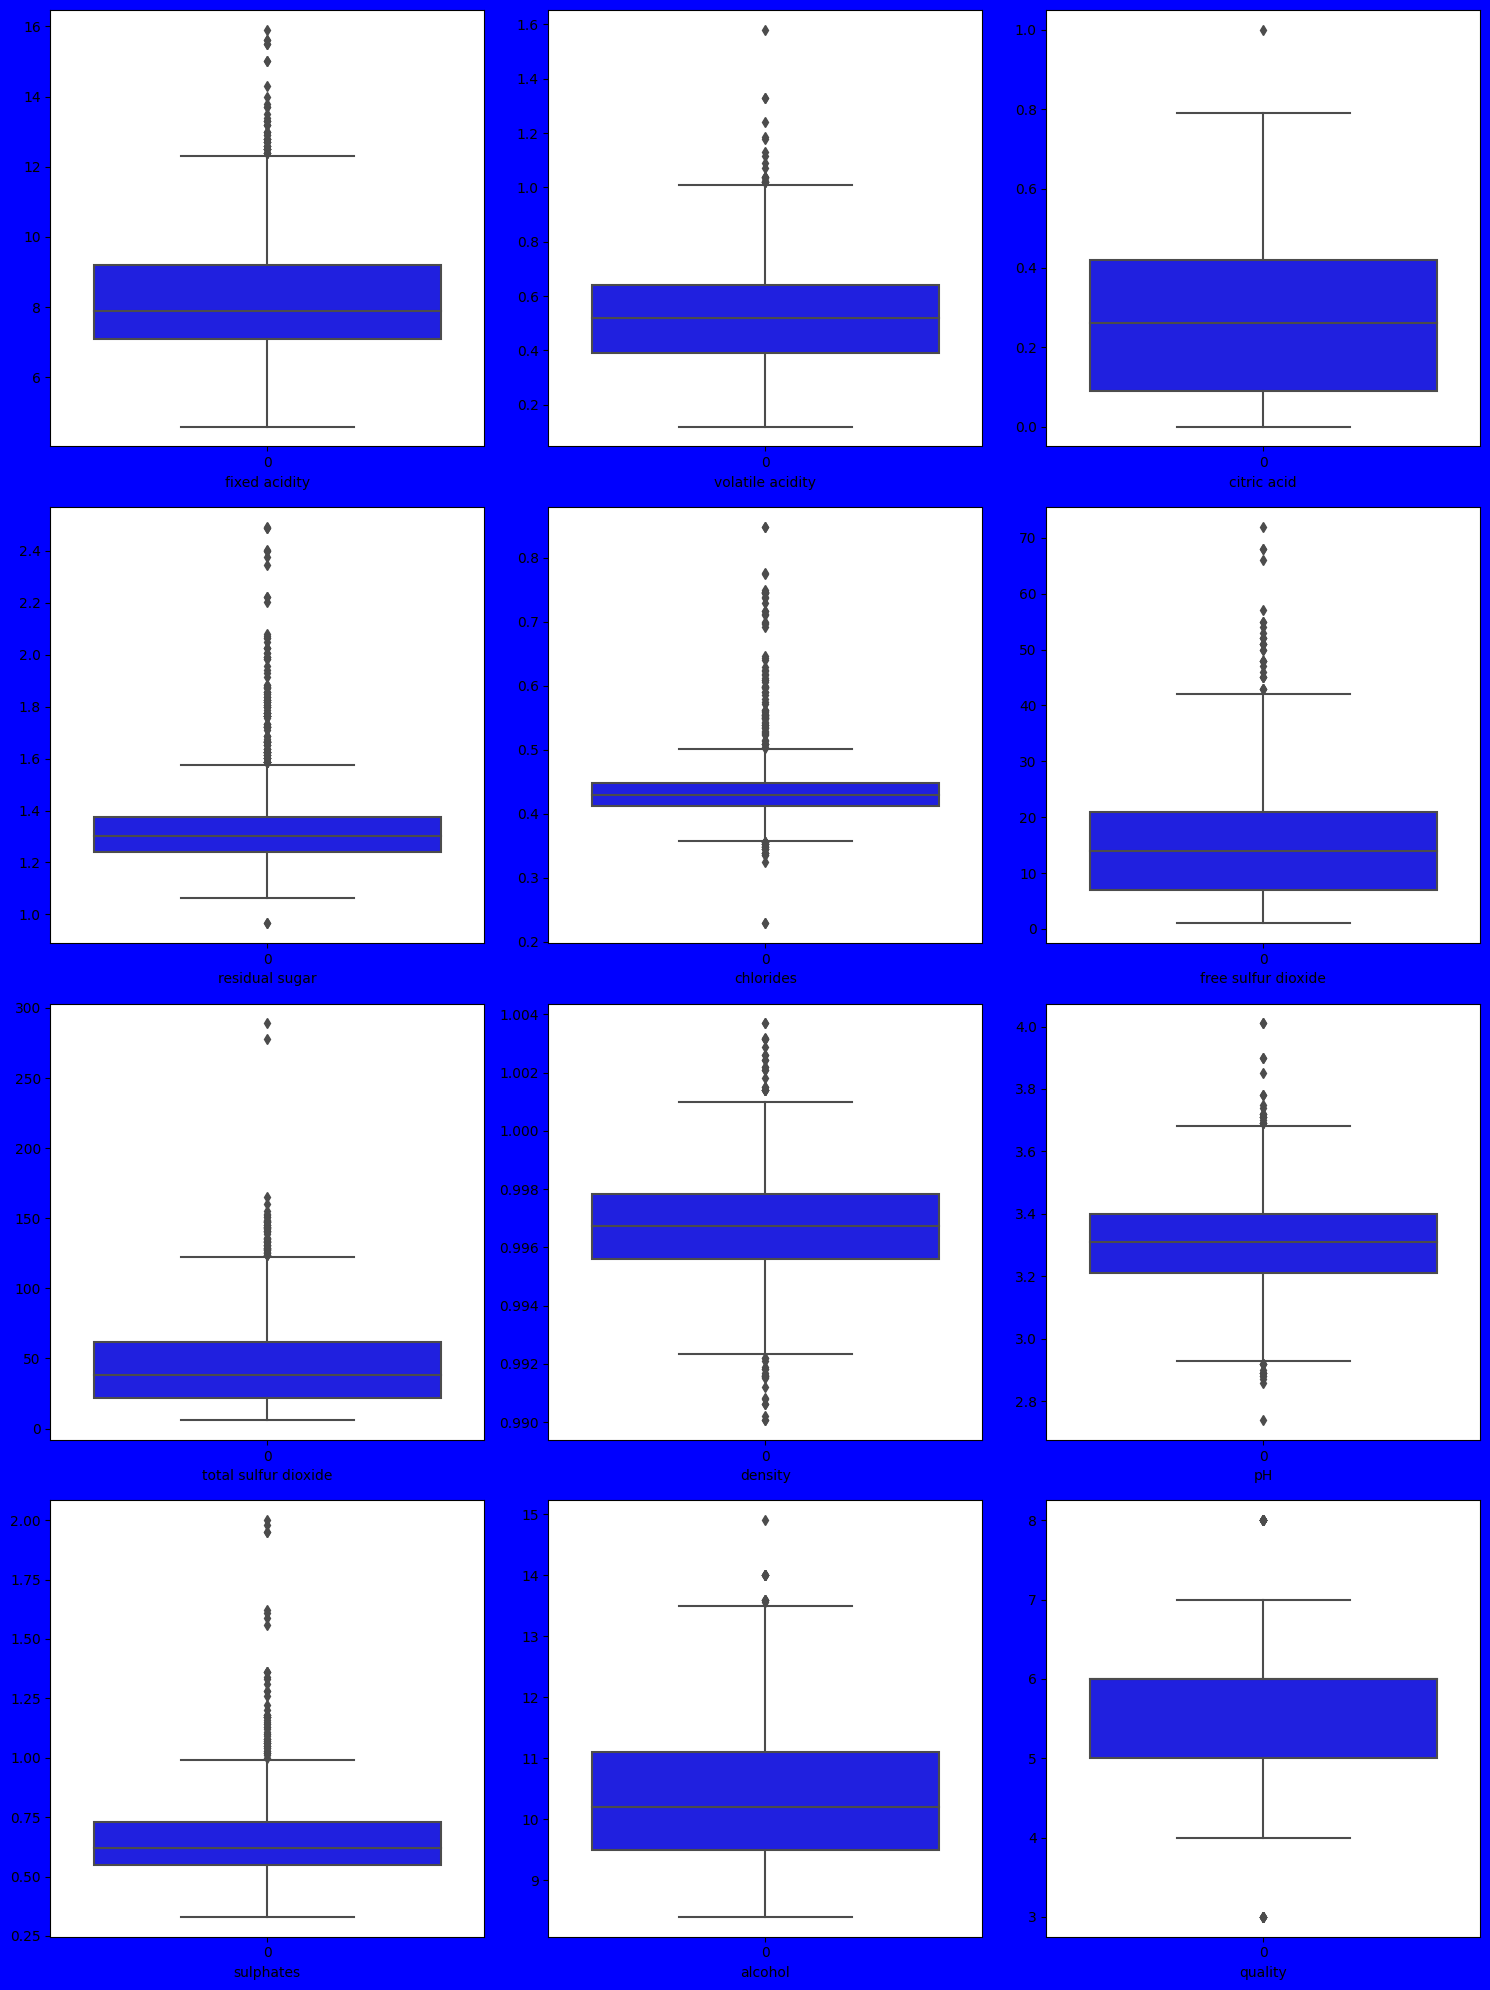

In [20]:
plt.figure(figsize=(15,20),facecolor='blue')
plotnumber=1
for column in df:
    anext=plt.subplot(4,3,plotnumber)
    sns.boxplot(df[column],color='blue')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout() 

In [21]:
columns=df.columns
out_lier=df[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
df1=df[(z<3).all(axis=1)]
print('data loss %:',(df.shape[0]-df1.shape[0])/(df.shape[0])*100)
print('***************************************************************************************************************************')
print('row & column:',df1.shape)

data loss %: 9.631019387116948
***************************************************************************************************************************
row & column: (1445, 12)


In [22]:
df2=df
q3=df2.quantile(0.75)
q1=df2.quantile(0.25)
iqr=(q3-q1)
df_val=pd.DataFrame(columns={'column','high','low'})
column=[]
high=[]
low=[]
for i in df2:
    column_high=q3[i]+1.5*iqr[i]
    column_low=q1[i]-1.5*iqr[i]
    column.append(i)
    high.append(column_high)
    low.append(column_low)
    

df_val=pd.DataFrame({'column':column,'high':high,'low':low})  
df_val  

column        high        low
0          fixed acidity   12.350000   3.950000
1       volatile acidity    1.015000   0.015000
2            citric acid    0.915000  -0.405000
3         residual sugar    1.579829   1.033803
4              chlorides    0.502158   0.358111
5    free sulfur dioxide   42.000000 -14.000000
6   total sulfur dioxide  122.000000 -38.000000
7                density    1.001187   0.992248
8                     pH    3.685000   2.925000
9              sulphates    1.000000   0.280000
10               alcohol   13.500000   7.100000
11               quality    7.500000   3.500000

In [23]:
index_acidity=np.where(df2['fixed acidity']>df_val.iloc[0,1])
df2=df2.drop(df2.index[index_acidity])
df2.reset_index()
index_v_acidity=np.where(df2['volatile acidity']>df_val.iloc[1,1])
df2=df2.drop(df2.index[index_v_acidity])
df2.reset_index()
index_citric_acid=np.where(df2['citric acid']>df_val.iloc[2,1])
df2=df2.drop(df2.index[index_citric_acid])
df2.reset_index()
index_residual_sugar=np.where(df2['residual sugar']>df_val.iloc[3,1])
df2=df2.drop(df2.index[index_residual_sugar])
df2.reset_index()
index_chlorides=np.where(df2['chlorides']>df_val.iloc[4,1])
df2=df2.drop(df2.index[index_chlorides])
df2.reset_index()
index_freeso2=np.where(df2['free sulfur dioxide']>df_val.iloc[5,1])
df2=df2.drop(df2.index[index_freeso2])
df2.reset_index()
index_totals02=np.where(df2['total sulfur dioxide']>df_val.iloc[6,1])
df2=df2.drop(df2.index[index_totals02])
df2.reset_index()
index_density=np.where(df2['density']>df_val.iloc[7,1])
df2=df2.drop(df2.index[index_density])
df2.reset_index()
index_pH=np.where(df2['pH']>df_val.iloc[8,1])
df2=df2.drop(df2.index[index_pH])
df2.reset_index()
index_sulphates=np.where(df2['sulphates']>df_val.iloc[9,1])
df2=df2.drop(df2.index[index_sulphates])
df2.reset_index()
index_alcohol=np.where(df2['alcohol']>df_val.iloc[10,1])
df2=df2.drop(df2.index[index_alcohol])
df2.reset_index()
index_quality=np.where(df2['quality']>df_val.iloc[11,1])
df2=df2.drop(df2.index[index_quality])
df2.reset_index()

print('data loss %:',(df.shape[0]-df2.shape[0])/(df.shape[0])*100)
print('***************************************************************************************************************************')
print('row & column:',df2.shape) 




data loss %: 23.327079424640402
***************************************************************************************************************************
row & column: (1226, 12)


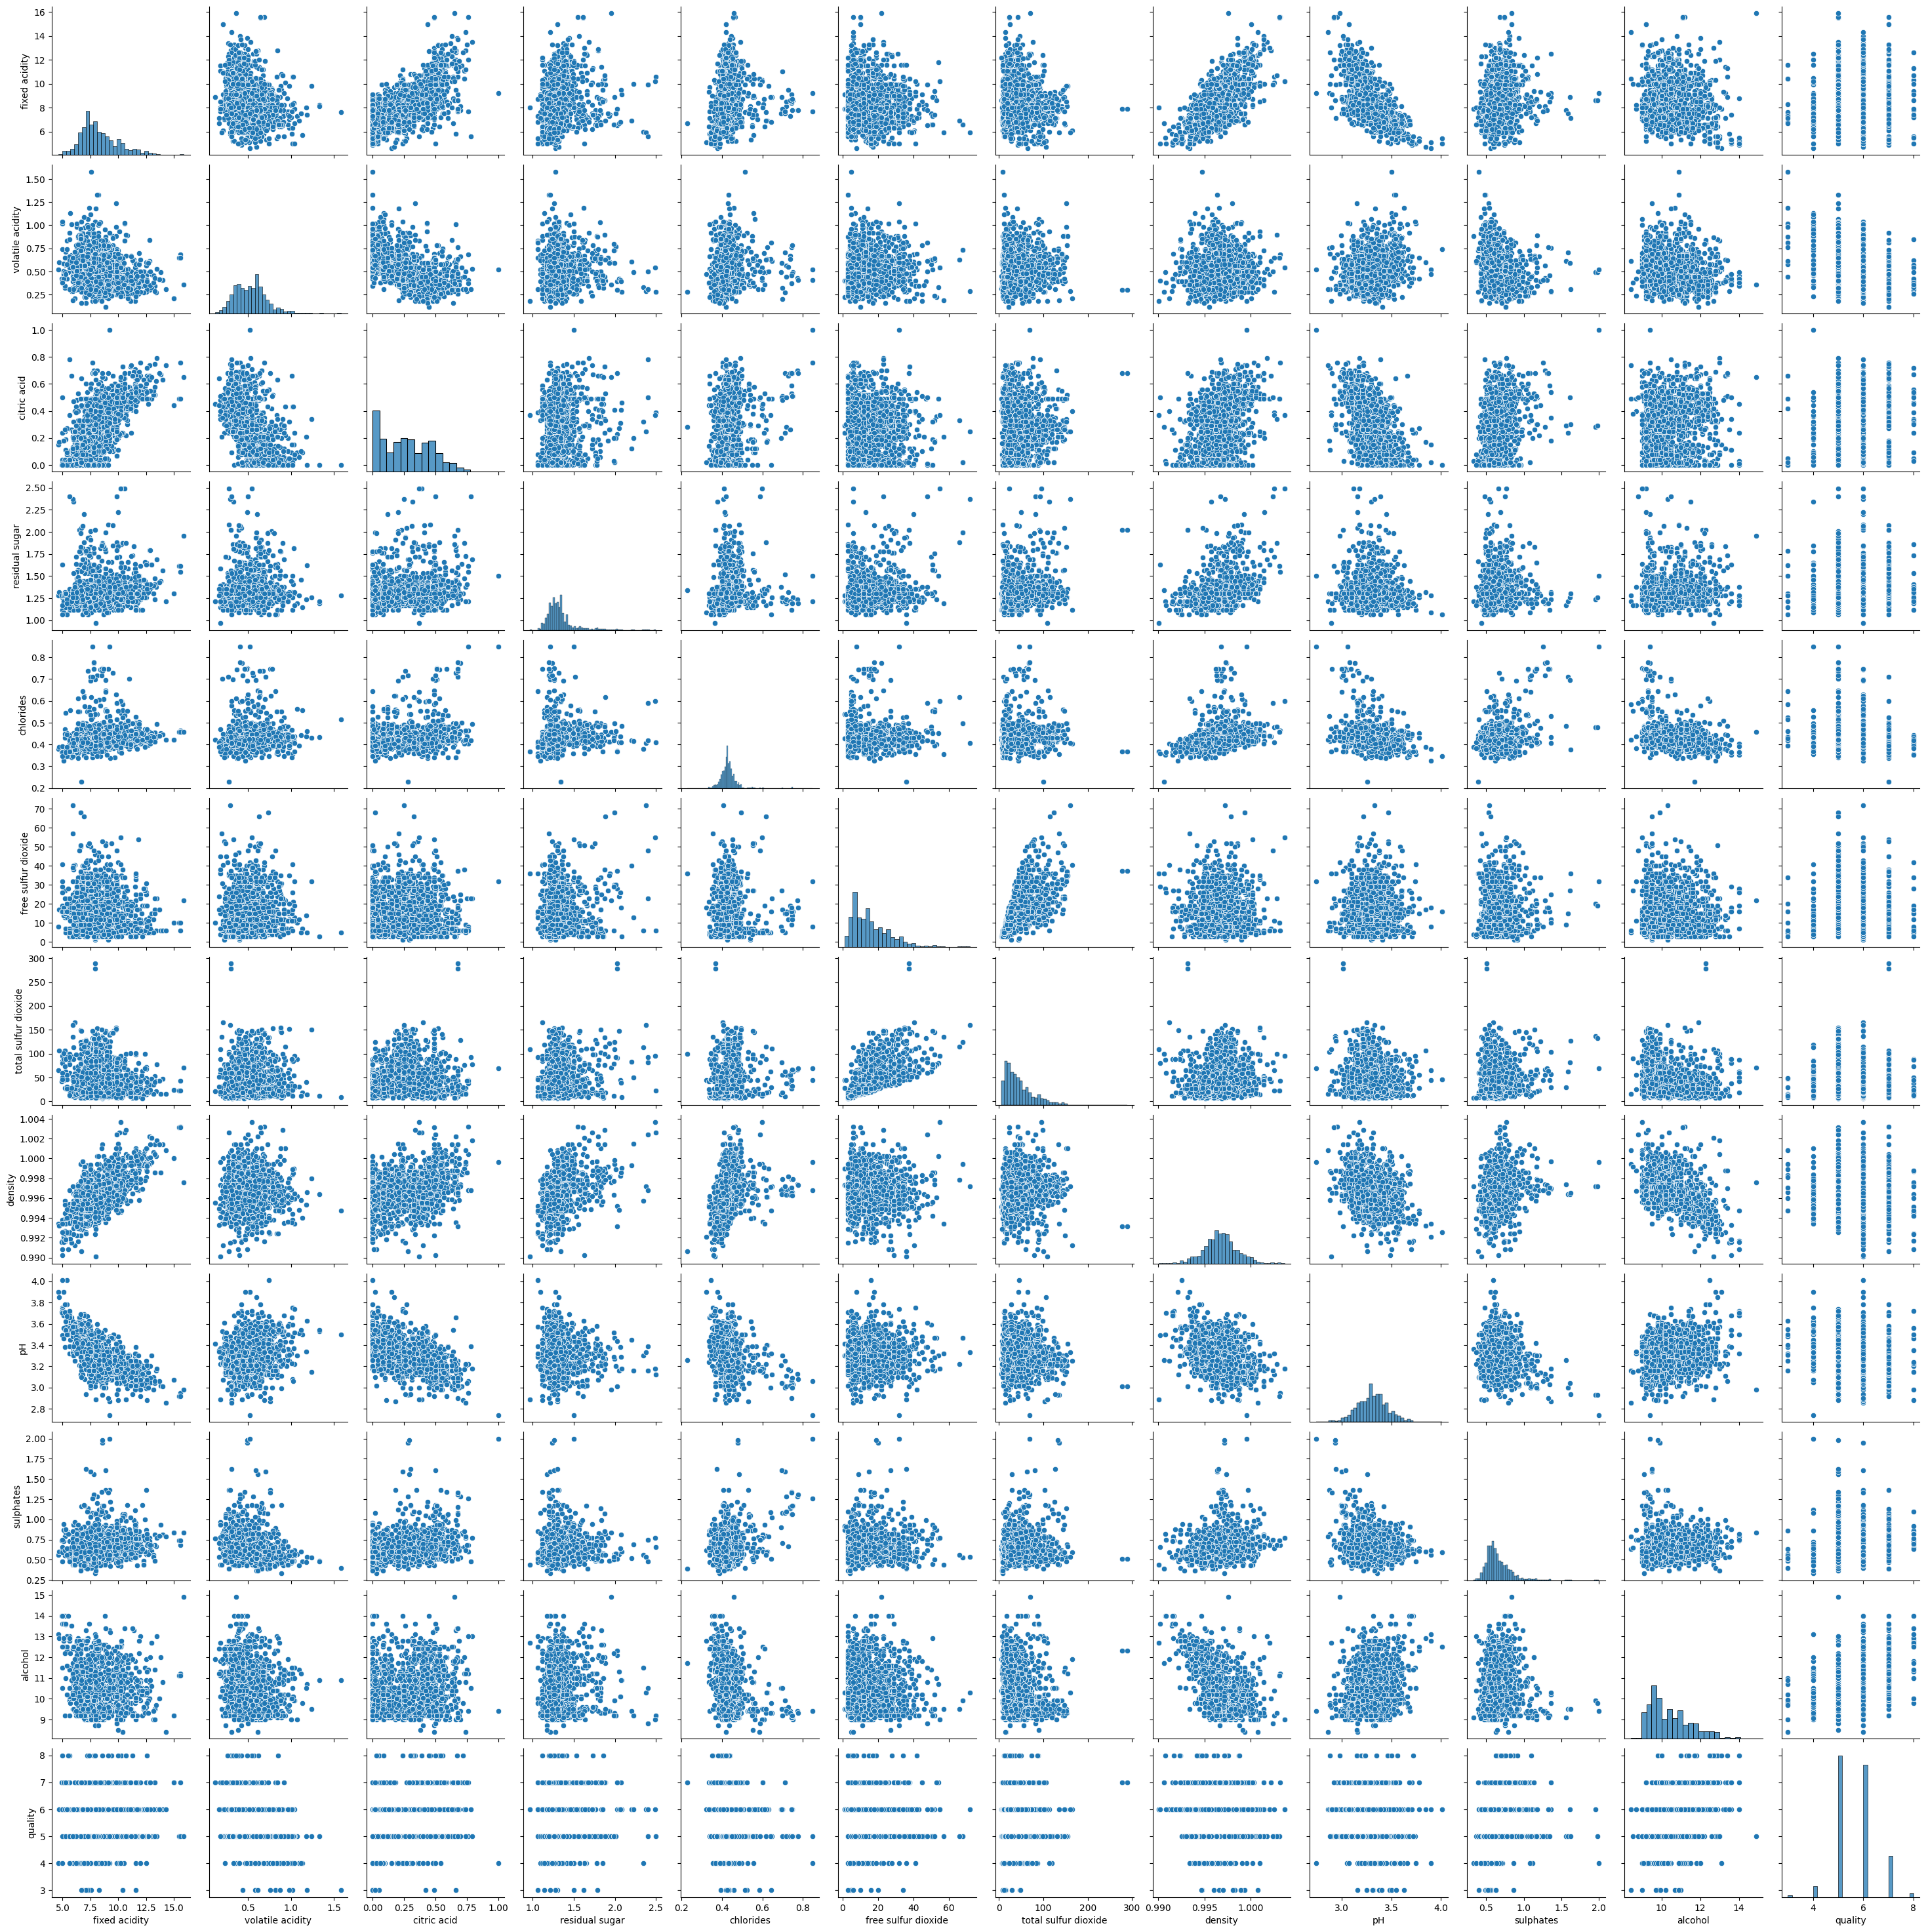

In [24]:
sns.pairplot(df)

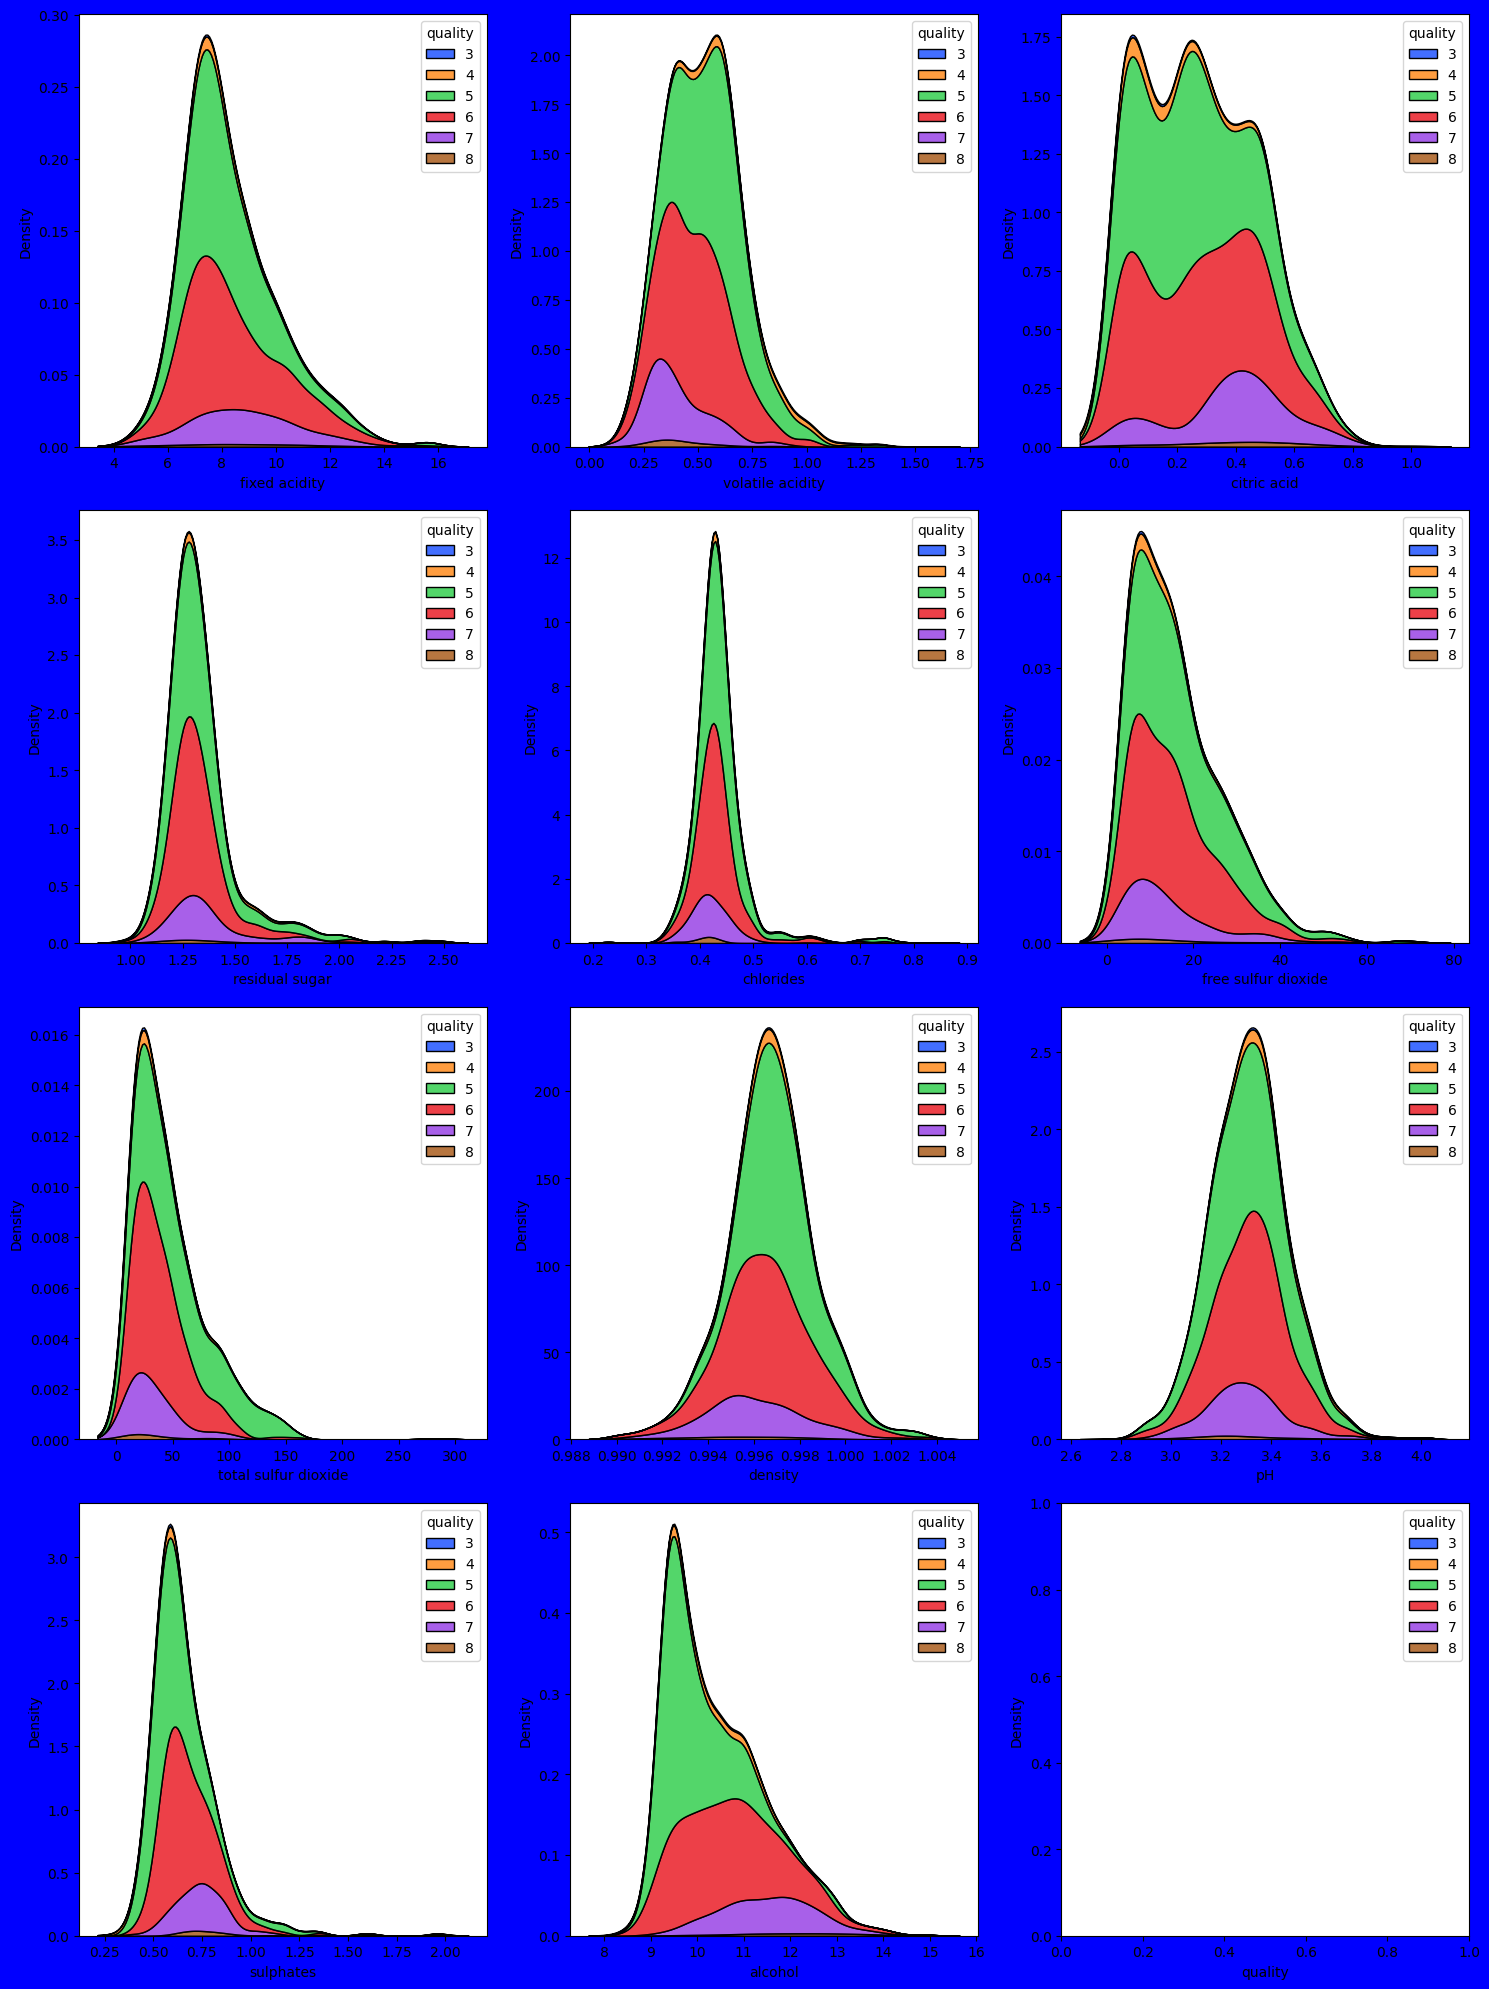

In [25]:
plt.figure(figsize=(15,20),facecolor='blue')
plotnumber=1
for column in df:
    anext=plt.subplot(4,3,plotnumber)
    sns.kdeplot(data=df, x=df[column], hue="quality",ax=anext,palette="bright",multiple='stack')
    plotnumber+=1
plt.tight_layout() 

In [26]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [27]:
x=df1.drop(columns=['quality'])
y=df1['quality']

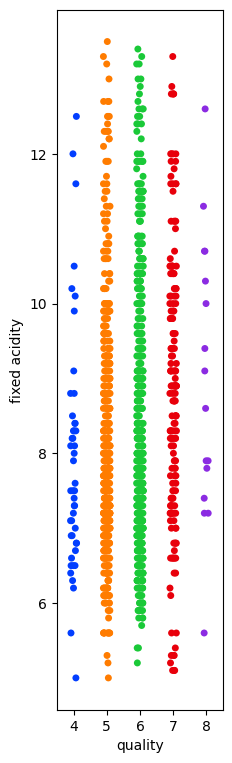

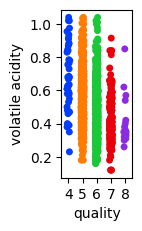

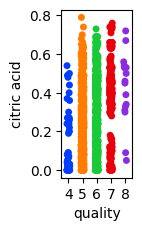

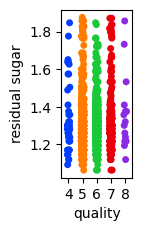

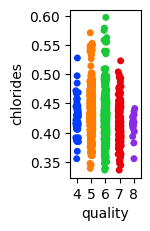

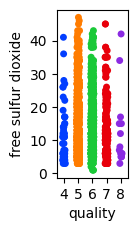

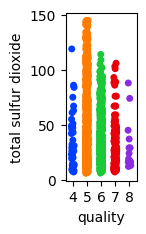

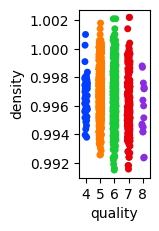

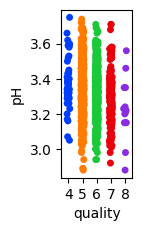

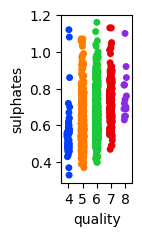

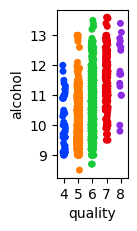

In [28]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    anext=plt.subplot(2,6,plotnumber)
    sns.stripplot(x=y,y=x[column],palette='bright')
    plotnumber=+1
    plt.show()   

In [29]:
cor=df1.corr()

<AxesSubplot:>

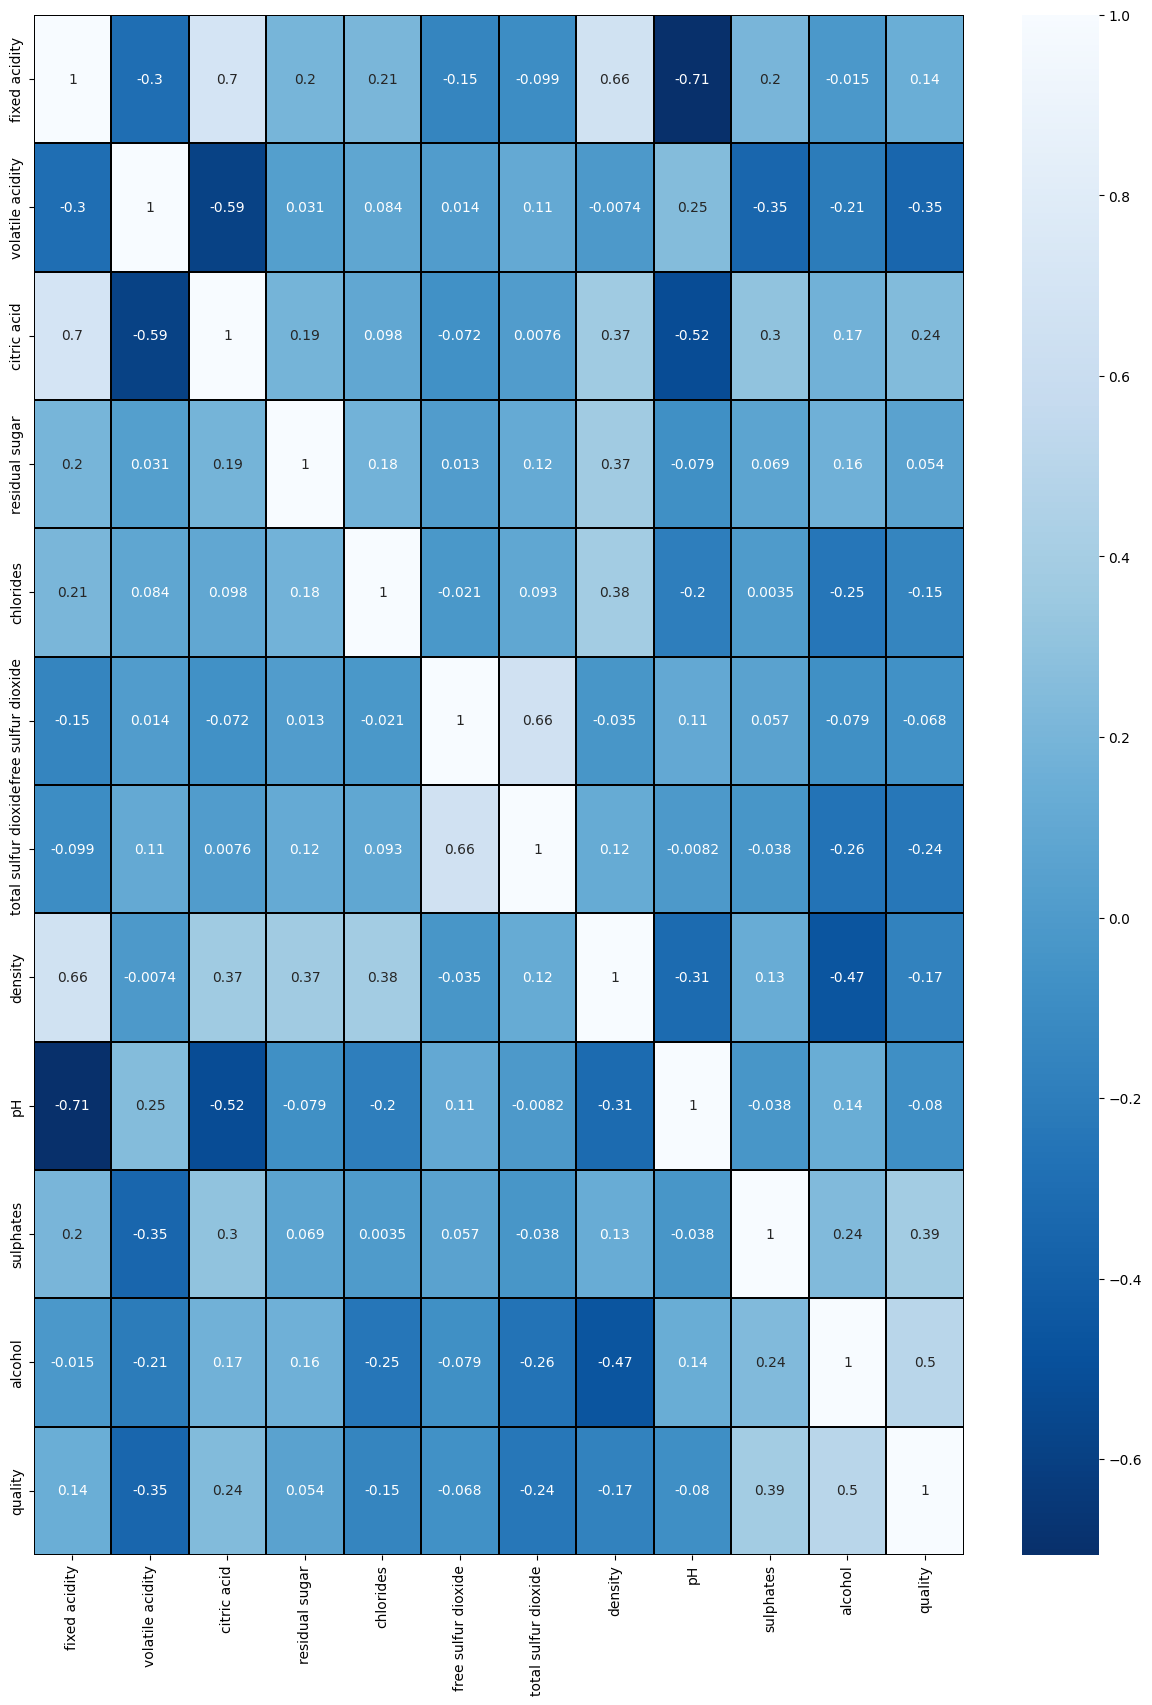

In [30]:
plt.figure(figsize=(15,20))
sns.heatmap(df1.corr(),cmap='Blues_r',fmt='0.2g',linecolor='black',annot=True,linewidths=0.1)

In [31]:
cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.502087
sulphates               0.385144
citric acid             0.241751
fixed acidity           0.144192
residual sugar          0.054016
free sulfur dioxide    -0.067785
pH                     -0.080113
chlorides              -0.150877
density                -0.169316
total sulfur dioxide   -0.235422
volatile acidity       -0.352871
Name: quality, dtype: float64

In [32]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [33]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif

vif               feature
0   7.996879         fixed acidity
1   1.854384      volatile acidity
2   3.180423           citric acid
3   1.773782        residual sugar
4   1.225488             chlorides
5   1.923777   free sulfur dioxide
6   2.192769  total sulfur dioxide
7   6.749683               density
8   3.231758                    pH
9   1.314949             sulphates
10  3.381022               alcohol

In [34]:
x.drop('fixed acidity',axis=1,inplace=True)

In [35]:
y.value_counts()

5    617
6    582
7    183
4     47
8     16
Name: quality, dtype: int64

In [36]:
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [37]:
y1.value_counts()

5    617
6    617
7    617
4    617
8    617
Name: quality, dtype: int64

In [38]:
max_accuracy=0
max_rs=0
for i in range (300):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i

print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)   

Maximum accuracy: 0.8736501079913607 on random state: 127


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=max_rs)

In [40]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
score_rfc=cross_val_score(RFC,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_RFC))
print('confusion metrics=',confusion_matrix(y_test,pred_RFC))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_RFC))
print('cross_val_score=',score_rfc)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_rfc.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_RFC)-score_rfc.mean())

Accuracy Score= 0.8779697624190065
confusion metrics= [[186   2   0   1   0]
 [ 11 142  25   1   1]
 [  5  32 109  22   1]
 [  1   3   6 182   2]
 [  0   0   0   0 194]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           4       0.92      0.98      0.95       189
           5       0.79      0.79      0.79       180
           6       0.78      0.64      0.71       169
           7       0.88      0.94      0.91       194
           8       0.98      1.00      0.99       194

    accuracy                           0.88       926
   macro avg       0.87      0.87      0.87       926
weighted avg       0.87      0.88      0.87       926

cross_val_score= [0.7649919  0.77795786 0.76823339 0.8006483  0.79740681]
--------------------------------------------------------------------------------------
avg value: 0.7818476499189627
----

In [41]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
score_ETC=cross_val_score(ETC,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_ETC))
print('confusion metrics=',confusion_matrix(y_test,pred_ETC))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_ETC))
print('cross_val_score=',score_ETC)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_ETC.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_ETC)-score_ETC.mean())

Accuracy Score= 0.8930885529157667
confusion metrics= [[182   4   2   1   0]
 [  7 150  21   1   1]
 [  4  25 117  20   3]
 [  1   3   4 184   2]
 [  0   0   0   0 194]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           4       0.94      0.96      0.95       189
           5       0.82      0.83      0.83       180
           6       0.81      0.69      0.75       169
           7       0.89      0.95      0.92       194
           8       0.97      1.00      0.98       194

    accuracy                           0.89       926
   macro avg       0.89      0.89      0.89       926
weighted avg       0.89      0.89      0.89       926

cross_val_score= [0.7828201  0.79092382 0.8006483  0.81037277 0.81523501]
--------------------------------------------------------------------------------------
avg value: 0.7999999999999999
----

In [42]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
score_DT=cross_val_score(DT,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_DT))
print('confusion metrics=',confusion_matrix(y_test,pred_DT))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_DT))
print('cross_val_score=',score_DT)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_DT.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_DT)-score_DT.mean())

Accuracy Score= 0.7710583153347732
confusion metrics= [[160  16  10   3   0]
 [ 18 124  31   6   1]
 [ 11  42  84  28   4]
 [  1   9  13 168   3]
 [  0   1   8   7 178]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           4       0.84      0.85      0.84       189
           5       0.65      0.69      0.67       180
           6       0.58      0.50      0.53       169
           7       0.79      0.87      0.83       194
           8       0.96      0.92      0.94       194

    accuracy                           0.77       926
   macro avg       0.76      0.76      0.76       926
weighted avg       0.77      0.77      0.77       926

cross_val_score= [0.66288493 0.72285251 0.70664506 0.70502431 0.71799028]
--------------------------------------------------------------------------------------
avg value: 0.7030794165316046
----

In [43]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)
pred_KNC=KNC.predict(x_test)
score_KNC=cross_val_score(KNC,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_KNC))
print('confusion metrics=',confusion_matrix(y_test,pred_KNC))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_KNC))
print('cross_val_score=',score_KNC)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_KNC.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_KNC)-score_KNC.mean())

Accuracy Score= 0.7894168466522679
confusion metrics= [[187   0   1   1   0]
 [ 34  98  39   8   1]
 [ 23  29  79  27  11]
 [  4   3   3 175   9]
 [  0   0   0   2 192]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           4       0.75      0.99      0.86       189
           5       0.75      0.54      0.63       180
           6       0.65      0.47      0.54       169
           7       0.82      0.90      0.86       194
           8       0.90      0.99      0.94       194

    accuracy                           0.79       926
   macro avg       0.78      0.78      0.77       926
weighted avg       0.78      0.79      0.77       926

cross_val_score= [0.71799028 0.72123177 0.72771475 0.75040519 0.73581848]
--------------------------------------------------------------------------------------
avg value: 0.7306320907617503
----

In [44]:
ADB=AdaBoostClassifier()
ADB.fit(x_train,y_train)
pred_ADB=ETC.predict(x_test)
score_ADB=cross_val_score(ADB,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_ADB))
print('confusion metrics=',confusion_matrix(y_test,pred_ADB))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_ADB))
print('cross_val_score=',score_ADB)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_ADB.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_ADB)-score_ADB.mean())

Accuracy Score= 0.8930885529157667
confusion metrics= [[182   4   2   1   0]
 [  7 150  21   1   1]
 [  4  25 117  20   3]
 [  1   3   4 184   2]
 [  0   0   0   0 194]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           4       0.94      0.96      0.95       189
           5       0.82      0.83      0.83       180
           6       0.81      0.69      0.75       169
           7       0.89      0.95      0.92       194
           8       0.97      1.00      0.98       194

    accuracy                           0.89       926
   macro avg       0.89      0.89      0.89       926
weighted avg       0.89      0.89      0.89       926

cross_val_score= [0.42949757 0.4732577  0.43435981 0.46839546 0.4732577 ]
--------------------------------------------------------------------------------------
avg value: 0.45575364667747165
---

In [45]:
GDB=GradientBoostingClassifier()
GDB.fit(x_train,y_train)
pred_GDB=ETC.predict(x_test)
score_gdb=cross_val_score(GDB,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_GDB))
print('confusion metrics=',confusion_matrix(y_test,pred_GDB))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_GDB))
print('cross_val_score=',score_gdb)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_gdb.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_GDB)-score_gdb.mean())

Accuracy Score= 0.8930885529157667
confusion metrics= [[182   4   2   1   0]
 [  7 150  21   1   1]
 [  4  25 117  20   3]
 [  1   3   4 184   2]
 [  0   0   0   0 194]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           4       0.94      0.96      0.95       189
           5       0.82      0.83      0.83       180
           6       0.81      0.69      0.75       169
           7       0.89      0.95      0.92       194
           8       0.97      1.00      0.98       194

    accuracy                           0.89       926
   macro avg       0.89      0.89      0.89       926
weighted avg       0.89      0.89      0.89       926

cross_val_score= [0.71474878 0.70016207 0.73095624 0.73905997 0.76175041]
--------------------------------------------------------------------------------------
avg value: 0.7293354943273906
----

In [46]:
GPC=GaussianProcessClassifier()
GPC.fit(x_train,y_train)
pred_gpc=GPC.predict(x_test)
score_gpc=cross_val_score(GPC,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_gpc))
print('confusion metrics=',confusion_matrix(y_test,pred_gpc))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_gpc))
print('cross_val_score=',score_gpc)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_gpc.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_gpc)-score_gpc.mean())

Accuracy Score= 0.8390928725701944
confusion metrics= [[188   1   0   0   0]
 [ 23 120  34   1   2]
 [  9  29 100  22   9]
 [  2   1   8 175   8]
 [  0   0   0   0 194]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           4       0.85      0.99      0.91       189
           5       0.79      0.67      0.73       180
           6       0.70      0.59      0.64       169
           7       0.88      0.90      0.89       194
           8       0.91      1.00      0.95       194

    accuracy                           0.84       926
   macro avg       0.83      0.83      0.83       926
weighted avg       0.83      0.84      0.83       926

cross_val_score= [0.75850891 0.74068071 0.71961102 0.78930308 0.76985413]
--------------------------------------------------------------------------------------
avg value: 0.7555915721231766
----

In [47]:
SVC=SVC()
SVC.fit(x_train,y_train)
pred_svc=SVC.predict(x_test)
score_svc=cross_val_score(SVC,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_svc))
print('confusion metrics=',confusion_matrix(y_test,pred_svc))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_svc))
print('cross_val_score=',score_svc)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_svc.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_svc)-score_svc.mean())

Accuracy Score= 0.7829373650107991
confusion metrics= [[183   2   2   2   0]
 [ 35 113  27   3   2]
 [ 13  39  85  26   6]
 [  4   5  21 150  14]
 [  0   0   0   0 194]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           4       0.78      0.97      0.86       189
           5       0.71      0.63      0.67       180
           6       0.63      0.50      0.56       169
           7       0.83      0.77      0.80       194
           8       0.90      1.00      0.95       194

    accuracy                           0.78       926
   macro avg       0.77      0.77      0.77       926
weighted avg       0.77      0.78      0.77       926

cross_val_score= [0.726094   0.72123177 0.70016207 0.75364668 0.73905997]
--------------------------------------------------------------------------------------
avg value: 0.7280388978930308
----

In [48]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
score_bc=cross_val_score(BC,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_BC))
print('confusion metrics=',confusion_matrix(y_test,pred_BC))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_BC))
print('cross_val_score=',score_bc)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_bc.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_BC)-score_bc.mean())

Accuracy Score= 0.8326133909287257
confusion metrics= [[179   7   2   1   0]
 [ 15 123  35   6   1]
 [  9  28 111  19   2]
 [  4   6  11 167   6]
 [  0   0   0   3 191]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           4       0.86      0.95      0.90       189
           5       0.75      0.68      0.72       180
           6       0.70      0.66      0.68       169
           7       0.85      0.86      0.86       194
           8       0.95      0.98      0.97       194

    accuracy                           0.83       926
   macro avg       0.82      0.83      0.82       926
weighted avg       0.83      0.83      0.83       926

cross_val_score= [0.74554295 0.7439222  0.7439222  0.75688817 0.77795786]
--------------------------------------------------------------------------------------
avg value: 0.7536466774716369
----

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid=[]
p=GridSearchCV.get_params(ETC,deep=True)
param_grid.append(p)

print(param_grid)

[{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}]


In [50]:
p1={'bootstrap': [False], 
    'criterion': ['gini'],'max_features': ['auto'], 'min_samples_leaf': [1], 'min_samples_split': [2], 
    'n_estimators': [100], 'oob_score': [False], 'warm_start': [False]}



In [51]:
GCV=GridSearchCV(ExtraTreesClassifier(),param_grid=p1,cv=5)

In [52]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [100],
                         'oob_score': [False], 'warm_start': [False]})

In [53]:
p_best=GCV.best_params_
p_best

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'oob_score': False,
 'warm_start': False}

In [54]:
final_model=ExtraTreesClassifier(
bootstrap=False,
criterion= 'gini',
max_features= 'auto',
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators=100,
oob_score= False,
warm_start= False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.41684665226782


In [55]:
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

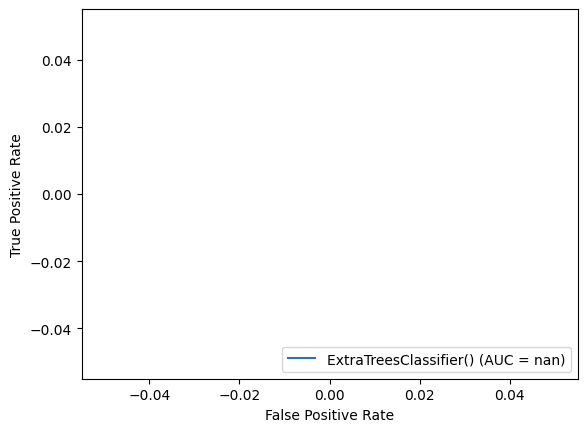

In [56]:
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred,pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(tpr=tpr,fpr=fpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [57]:
file_name='WINE.pkl'
pickle.dump(final_model,open(file_name,'wb'))